In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def function_for_roots(x):
    a =  1.01
    b = -3.04
    c =  2.07
    return a*x**2 + b*x +c #get the roots of ax^2 + bx + c

In [6]:
def check_initial_values(f, x_min, x_max, tol):
    
    #check our initial guesses
    y_min = f(x_min)
    y_max = f(x_max)
    
    #check that x_min and x_max contain a zero crossing
    if(y_min*y_max>0.0):
        print("No zero crossing found in range =",x_min,x_max)
        s = "f(%f) = %f, f(%f) = %f" % (x_min,y_min,x_max,y_max)
        print(s)
        return 0
    
    #if x_min is a root, then return flag == 1
    if(np.fabs(y_min)<tol):
        return 1
    
    #if x_max is a root, then return flag == 2
    if(np.fabs(y_max)<tol):
        return 2
    
    #if we reach this point, the bracket is valid and we will return 3
    return 3

In [40]:
def bisection_root_finding(f, x_min_start, x_max_start, tol):

    #this function uses bisection search to find a root

    x_min = x_min_start #minimum x in bracket
    x_max = x_max_start #maximum x in bracket
    x_mid = 0.0         #mid point search
    
    y_min = f(x_min) #function value at x_min
    y_max = f(x_min) #function value at x_max
    y_mid = 0.0     #function value at mid point
    
    imax = 10000     #set a maximum number of iterations
    i = 0            #iteration counter
    
    #check the initial values
    flag = check_initial_values(f,x_min,x_max,tol)
    if(flag==0):
        print("Error in bisection_root_finding().")
        raise ValueError('Initial values invalid',x_min,x_max)
    elif(flag==1):
        #lucky guess
        return x_min
    elif(flag==2):
        #another lucky guess
        return x_max
    
    #if we reach here, then we need to conduct the search
    
    #set a flag
    keepgoing = True
    
    #enter a while loop
    while(keepgoing):
        x_mid = 0.5*(x_min+x_max)  #mid point
        y_mid = f(x_mid)           #function value at x_mid
        
        #check if x_mid is a root
        if(np.fabs(y_mid)<tol):
            keepgoing = False
        else:
            #x is not a root
            
            #if the product of the function at the midpoint and at one of the end points is greater than zero, replace this endpoint
            if(f(x_min)*f(x_mid)>0):
                #replace x_min with x_mid
                x_min = x_mid
            else:
                #replace x_max with x_mid
                x_max = x_mid

        #print out the itteration
        print(x_min,f(x_min),x_max,f(x_max))
        
        #count the iteration
      
        #if we have exceeded the max number of iterations, exit
        if(i>=imax):
            print("Exceeded max number of iterations = ", i)
            s = "Min bracket f(%f) = %f" % (x_min,f(x_min))
            print(s)
            s = "Max bracket f(%f) = %f" % (x_max,f(x_max))
            print(s)
            s = "Mid bracket f(%f) = %f" % (x_mid,f(x_mid))
            print(s)
            raise StopIteration('stopping iterations after',i)
        
              
    #we are done
    return x_mid

In [41]:
x_min = 0.0
x_max = 1.5
tolerance = 1.0e-6

#print initial guesses
print(x_min,function_for_roots(x_min))
print(x_max,function_for_roots(x_max))

x_root = bisection_root_finding(function_for_roots,x_min,x_max,tolerance)
y_root = function_for_roots(x_root)

s = "Root found with y(%f) - %f" % (x_root,y_root)
d = "18 iterations" #cound not figure out how to count iterations so i just counted by hand and printed it out
print(s)
print(d)

0.0 2.07
1.5 -0.2175000000000007
0.75 0.3581249999999996 1.5 -0.2175000000000007
0.75 0.3581249999999996 1.125 -0.07171875000000005
0.9375 0.10769531249999975 1.125 -0.07171875000000005
1.03125 0.009111328124999485 1.125 -0.07171875000000005
1.03125 0.009111328124999485 1.078125 -0.033522949218749876
1.03125 0.009111328124999485 1.0546875 -0.012760620117187482
1.03125 0.009111328124999485 1.04296875 -0.0019633483886720704
1.037109375 0.0035393142700193003 1.04296875 -0.0019633483886720704
1.0400390625 0.0007793140411376243 1.04296875 -0.0019633483886720704
1.0400390625 0.0007793140411376243 1.04150390625 -0.0005941843986509987
1.040771484375 9.202301502186927e-05 1.04150390625 -0.0005941843986509987
1.040771484375 9.202301502186927e-05 1.0411376953125 -0.0002512161433698701
1.040771484375 9.202301502186927e-05 1.04095458984375 -7.963042706249368e-05
1.040863037109375 6.1878282573424315e-06 1.04095458984375 -7.963042706249368e-05
1.040863037109375 6.1878282573424315e-06 1.04090881347656

0.75 0.3581249999999996 1.5 -0.2175000000000007
0.75 0.3581249999999996 1.125 -0.07171875000000005
0.9375 0.10769531249999975 1.125 -0.07171875000000005
1.03125 0.009111328124999485 1.125 -0.07171875000000005
1.03125 0.009111328124999485 1.078125 -0.033522949218749876
1.03125 0.009111328124999485 1.0546875 -0.012760620117187482
1.03125 0.009111328124999485 1.04296875 -0.0019633483886720704
1.037109375 0.0035393142700193003 1.04296875 -0.0019633483886720704
1.0400390625 0.0007793140411376243 1.04296875 -0.0019633483886720704
1.0400390625 0.0007793140411376243 1.04150390625 -0.0005941843986509987
1.040771484375 9.202301502186927e-05 1.04150390625 -0.0005941843986509987
1.040771484375 9.202301502186927e-05 1.0411376953125 -0.0002512161433698701
1.040771484375 9.202301502186927e-05 1.04095458984375 -7.963042706249368e-05
1.040863037109375 6.1878282573424315e-06 1.04095458984375 -7.963042706249368e-05
1.040863037109375 6.1878282573424315e-06 1.0409088134765625 -3.6723415833161965e-05
1.0408

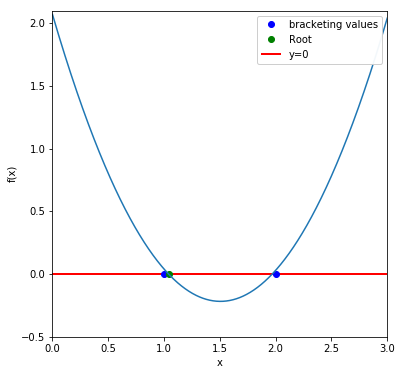

In [42]:
fig = plt.figure(figsize=(6,6))

x = np.linspace(0,3,1000)
u = bisection_root_finding(function_for_roots,x_min,x_max,tolerance)
v = function_for_roots(x_root)

a =  1.01
b = -3.04
c =  2.07
z =  0.0
y = a*x**2 + b*x +c

plt.plot(1,0,'bo',label="bracketing values") # plotting bracketing value 1
plt.plot(2,0,'bo') #plotting bracketing value 2
plt.plot(u, v, 'go', label="Root") #plotting the root

plt.plot(x,y) #plotting the function
plt.hlines(y=0.0, xmin=0, xmax=3, linewidth=2, color='r', label="y=0")

plt.xlabel('x')
plt.ylabel('f(x)')

plt.xlim(0,3)
plt.ylim(-0.5,2.1)

plt.legend(loc=1,framealpha=0.95)